## Chapter 7: Regression

### 7.1 Introduction

###  7.2 Simple Linear Regression
#### 7.2.1 Fitting the Model


__Example 7.1 (cars).__ Consider a set of paired observations of speed and stopping distance of cars. Is there a linear relation between stopping distance and
speed of a car?

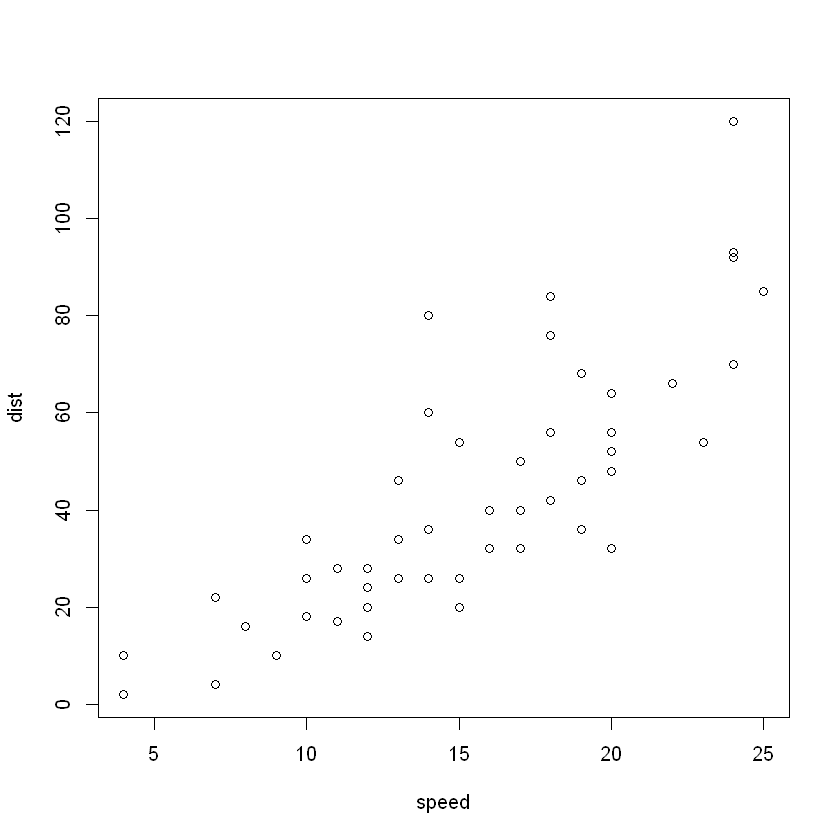

In [1]:
attach(cars) #attach the data
plot(cars) #construct scatterplot

### The __lm__ function and the model formula <br>
The linear model function is __lm__. This function estimates the parameters of a
linear model by the least squares method. A linear model is specified in R by
a model formula.<br>
The R formula that specifies a simple linear regression model dist = β0 + β1speed+ ε is simply: <br>
>        dist ∼ speed <br>

<br> The model formula is the first argument to the lm (linear model) function.
In this example, the estimated regression model is obtained by<br>

In [2]:
lm(dist ~ speed)


Call:
lm(formula = dist ~ speed)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


The function lm displays only the estimated coefficients, but the object returned by lm contains much more information, which we will explore below.
As we want to analyze the fit of this model, it is useful to store the result:

In [3]:
L1 = lm(dist ~ speed)
summary(L1)


Call:
lm(formula = dist ~ speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


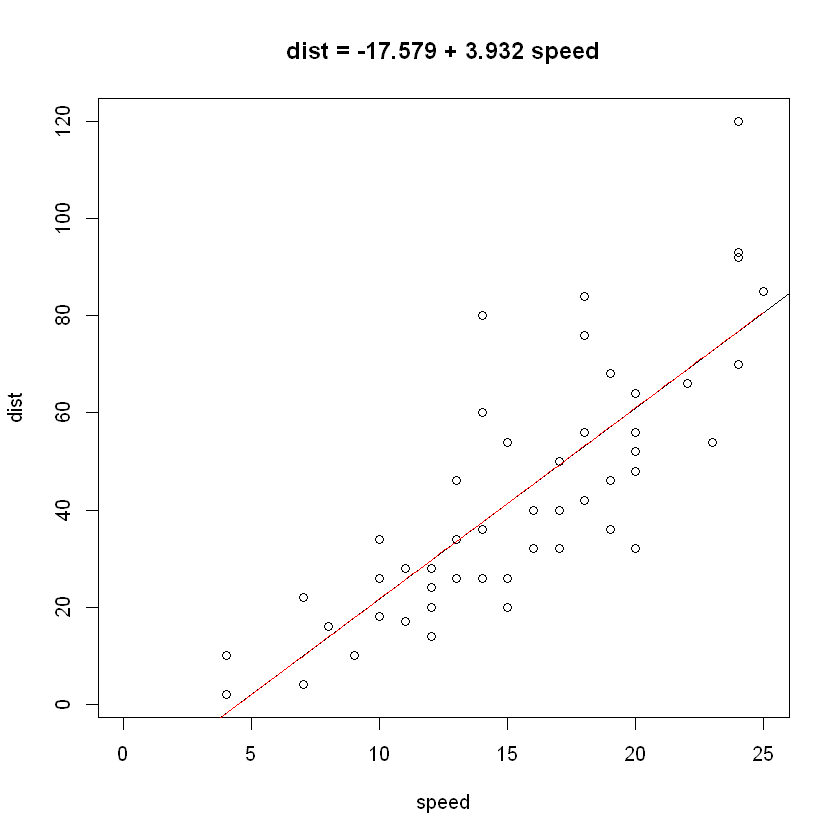

In [7]:
plot(cars, main="dist = -17.579 + 3.932 speed", xlim=c(0, 25))
#line with intercept=-17.579, slope=3.932
abline(-17.579, 3.932)
curve(-17.579 + 3.932*x, add=TRUE, col = "red") #same thing

#### 7.2.2 Residuals


The residuals are the vertical distances from the observed stopping distance
dist (the plotting symbol) to the line. The paired observations are (xi,yi) =
(speedi,disti), i = 1,...,50. The residuals are <br>
ei = yi −yˆi, <br>
where yˆi denotes the value of stopping distance predicted by the model at
speed xi. In this problem, yˆi = −17.579+3.932xi. 

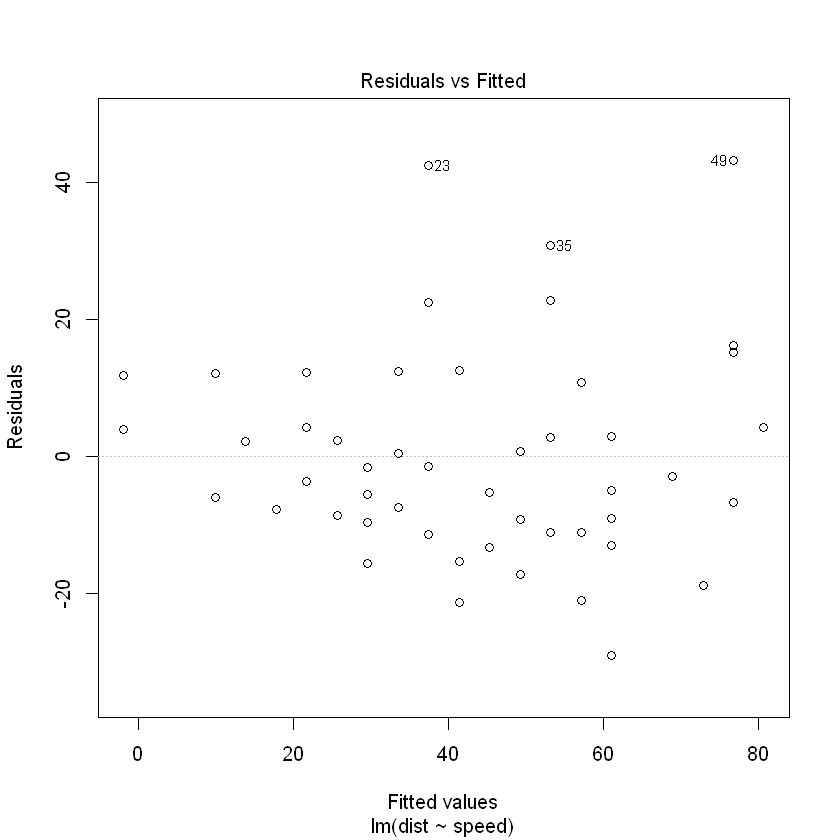

In [8]:
plot(L1, which=1, add.smooth=FALSE)

#### 7.2.3 Regression through the origin

__Example 7.2 (cars, cont.).__ <br>The cars data includes speeds as slow as 4 mph,
and the estimated intercept should correspond to the expected distance required to stop a car that is not moving; however, our estimated intercept is -17.579 feet. The model with intercept zero<br>
Y = β1X + ε<br>
can be estimated by explicitly including the intercept 0 in the model formula.<br>

In [9]:
L2 = lm(dist ~ 0 + speed)
L2


Call:
lm(formula = dist ~ 0 + speed)

Coefficients:
speed  
2.909  


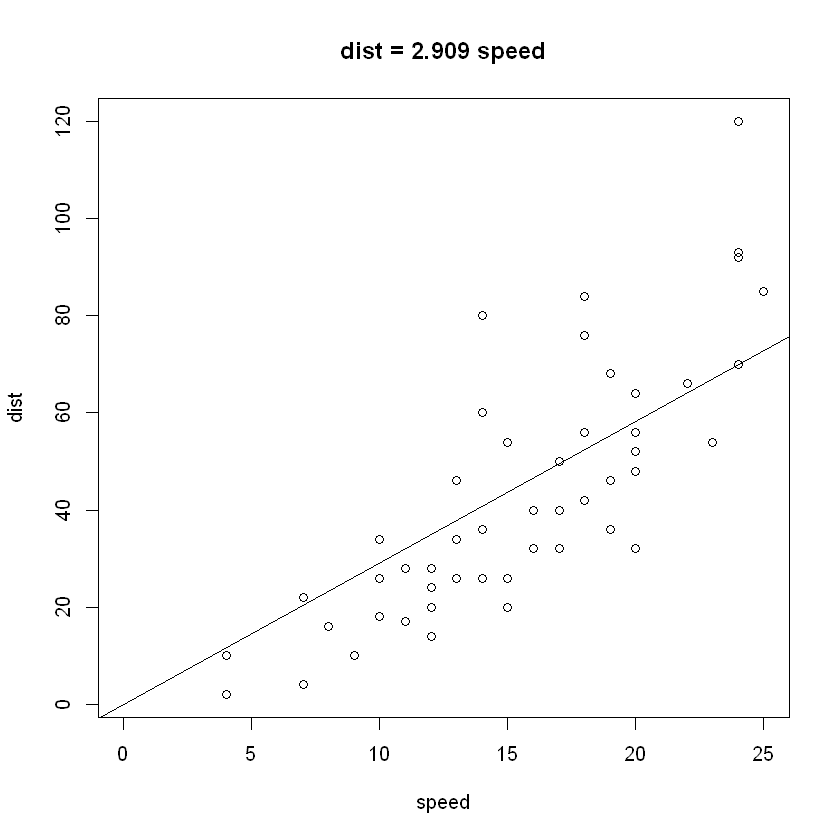

In [13]:
plot(cars, main="dist = 2.909 speed", xlim=c(0,25))
abline(0, 2.909)

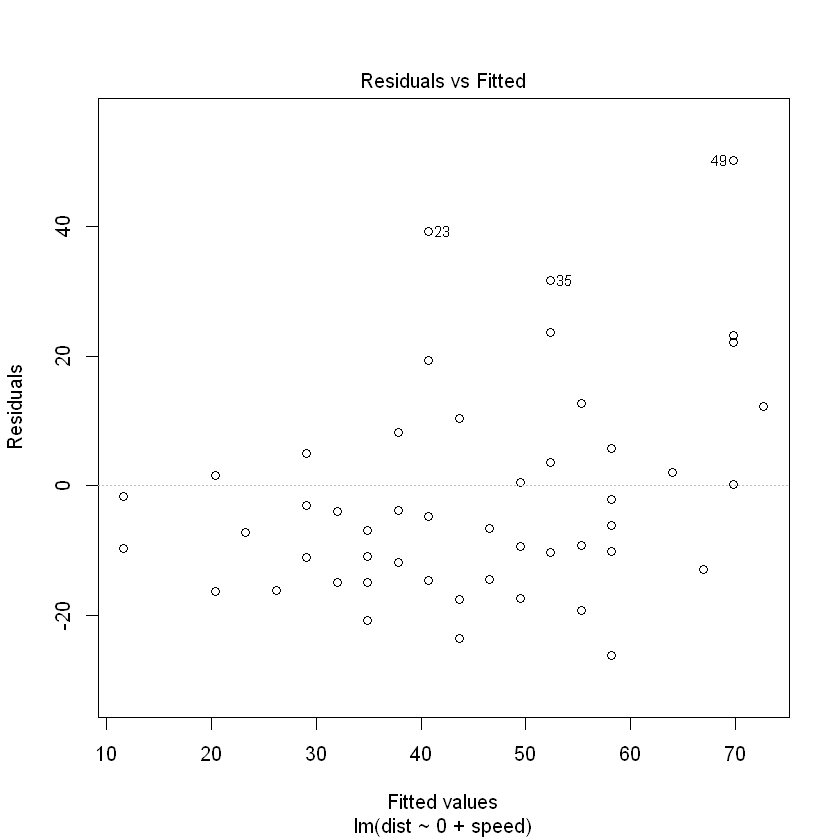

In [12]:
 plot(L2, which=1, add.smooth=FALSE)

In [14]:
detach(cars)

### 7.3 Regression Analysis for Data with Two Predictors


#### 7.3.1 Preliminary analysis


In [15]:
Trees = trees
names(Trees)[1] = "Diam"
attach(Trees)

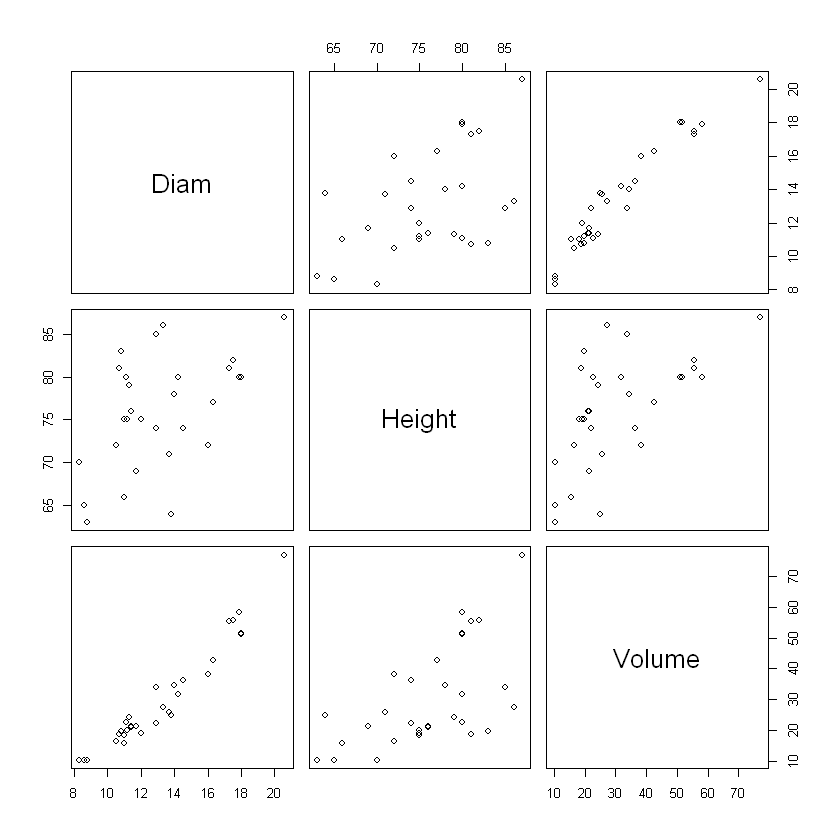

In [16]:
pairs(Trees)

In [17]:
cor(Trees)

,Diam,Height,Volume
Diam,1.0000000,0.5192801,0.9671194
Height,0.5192801,1.0000000,0.5982497
Volume,0.9671194,0.5982497,1.0000000


In [18]:
 M1 = lm(Volume ~ Diam)
print(M1)


Call:
lm(formula = Volume ~ Diam)

Coefficients:
(Intercept)         Diam  
    -36.943        5.066  



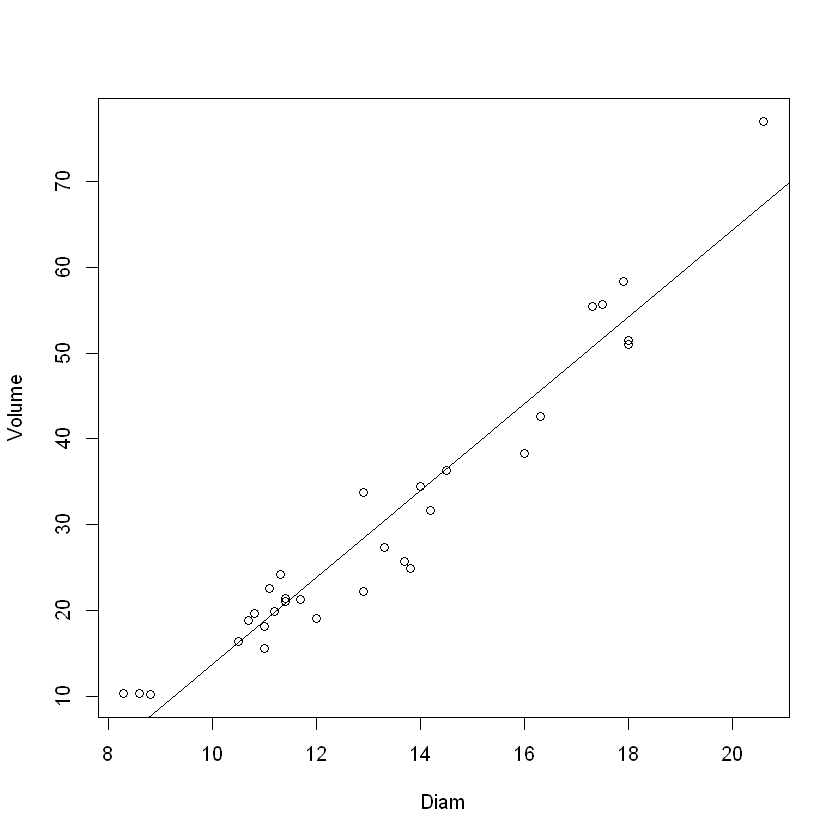

In [19]:
plot(Diam, Volume)
abline(M1$coef)

In [20]:
 new = data.frame(Diam=16)
predict(M1, new)

1 
44.11024

#### 7.3.2 Multiple regression model

__Example 7.4 (Model for Volume of Cherry Trees, cont.).__ Next we consider
the two variable model for predicting volume of cherry trees given diameter
and height. This is a multiple regression model with two predictors; X1 is the
diameter and X2 is the height of the tree. The response variable is Y , the
volume. Call this Model 2 <br>
Least squares estimates of the parameters of multiple linear regression
models are obtained by lm, using similar syntax as for simple linear regression.
The model formula determines which type of model is fit. The model formula
we require is<br>
Volume ∼ Diam+ Height<br>
and we fit the model, store it as M2, then print the result with the command<br>

In [22]:
M2 = lm(Volume ~ Diam + Height)
summary(M2)


Call:
lm(formula = Volume ~ Diam + Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Diam          4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


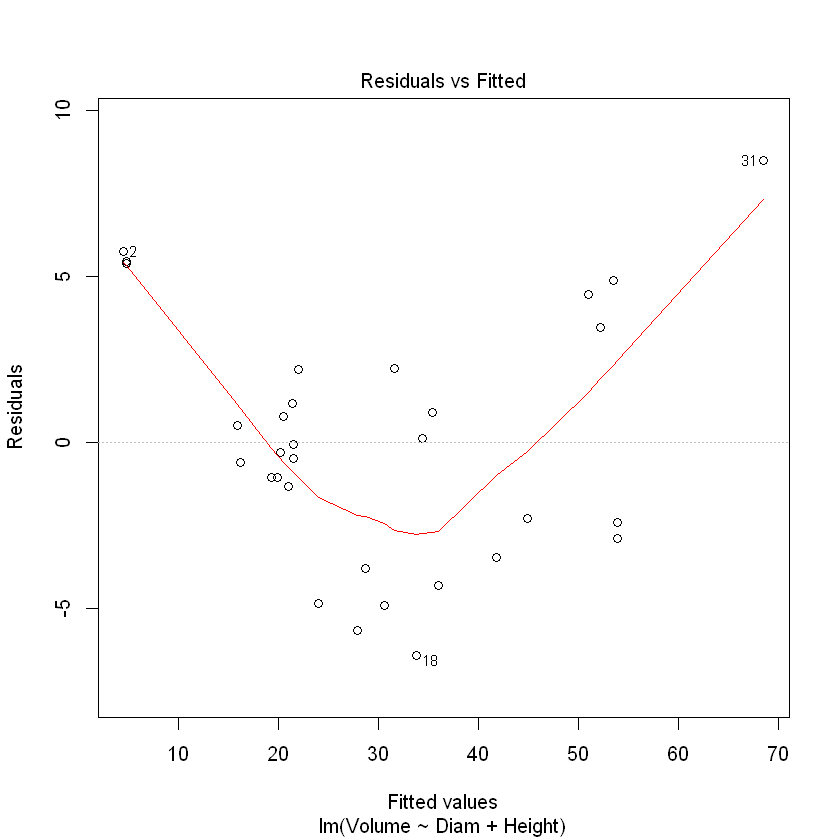

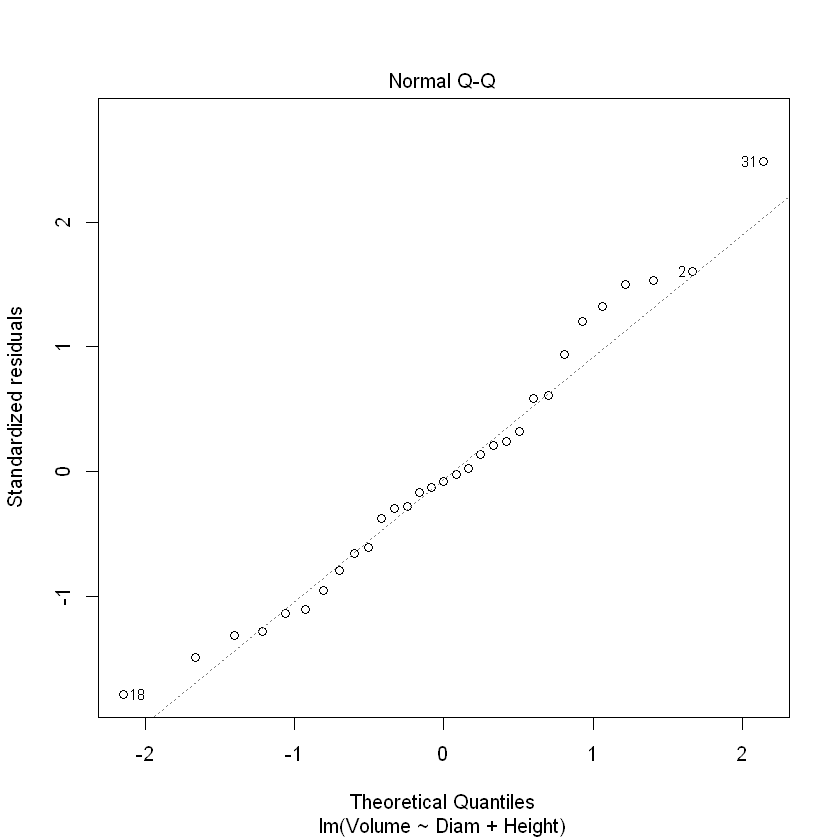

In [23]:
plot(M2, which=1:2)

__Example 7.5 (Model for Cherry Trees, cont.).__ Finally, let us fit a model that
also includes the square of diameter as a predictor. Call this Model 3. The
model is specified by the formula <br>
                                           Volume ~ Diam + I(Diam^2) + Height<br>
where I(Diam^2) means to interpret Diam^2 “as is” (the square of Diam)
rather than interpret the exponent as a formula operator. We fit the model,
storing the result in M3.

In [24]:
M3 = lm(Volume ~ Diam + I(Diam^2) + Height)
print(M3)


Call:
lm(formula = Volume ~ Diam + I(Diam^2) + Height)

Coefficients:
(Intercept)         Diam    I(Diam^2)       Height  
    -9.9204      -2.8851       0.2686       0.3764  



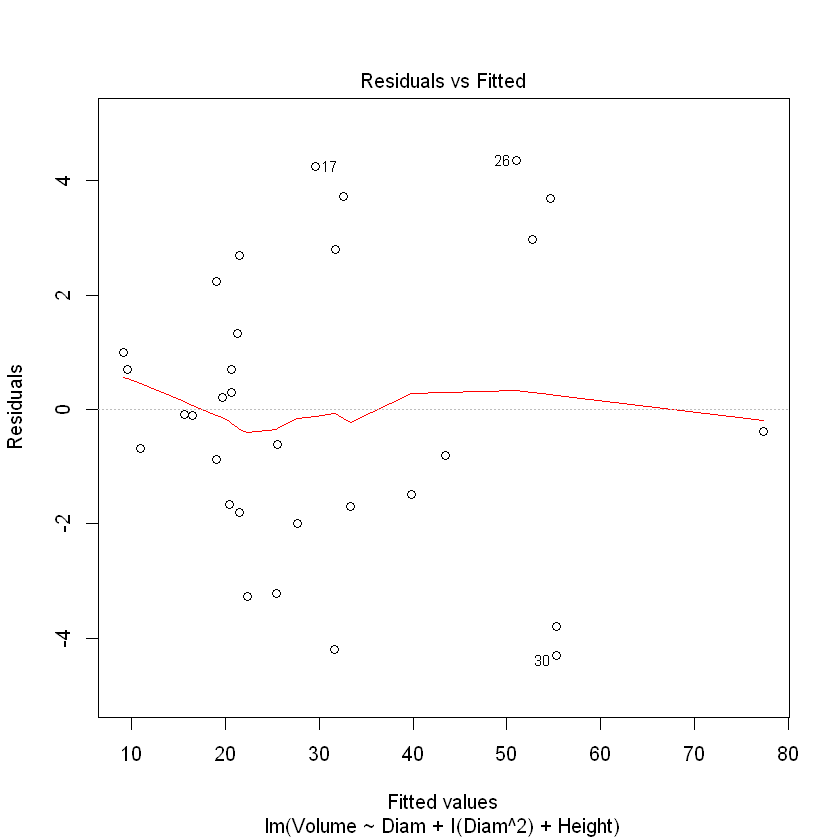

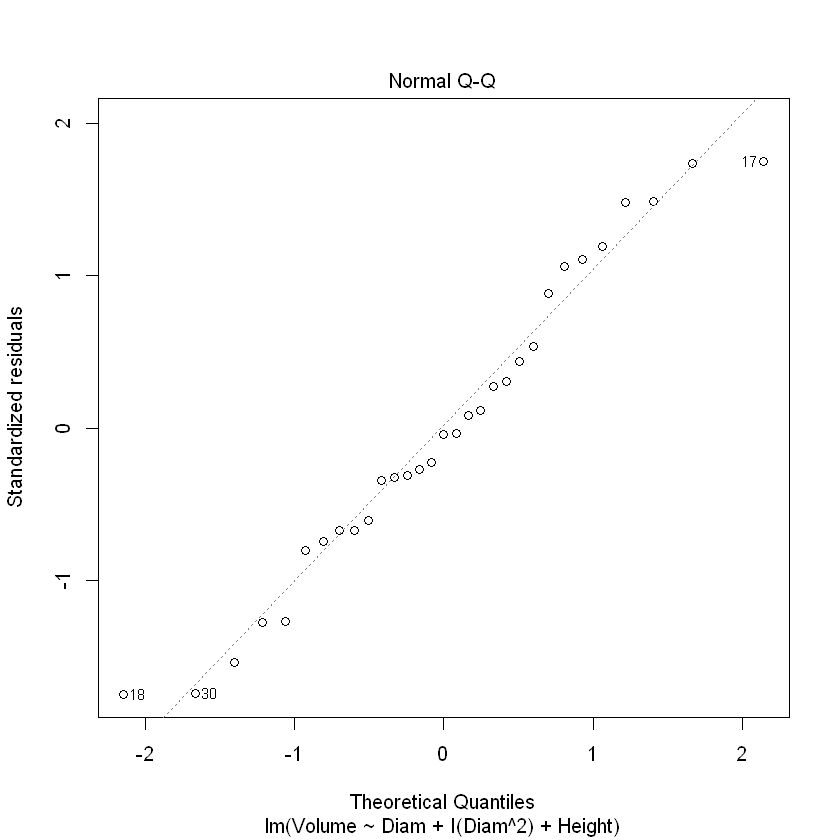

In [25]:
plot(M3, which=1:2)

### 7.3.3 The summary and anova methods for lm

The summary of the fitted model contains additional information about the
model. In the result of summary we find a table of the coefficients with standard errors, a five number summary of residuals, the coefficient of determination (R2), and the residual standard error. <br>
__Example 7.6 (Cherry Trees Model 3).__ The summary of our multiple regression
fit stored in M3 is obtained below. <br>

In [26]:
summary(M3)


Call:
lm(formula = Volume ~ Diam + I(Diam^2) + Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2928 -1.6693 -0.1018  1.7851  4.3489 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.92041   10.07911  -0.984 0.333729    
Diam        -2.88508    1.30985  -2.203 0.036343 *  
I(Diam^2)    0.26862    0.04590   5.852 3.13e-06 ***
Height       0.37639    0.08823   4.266 0.000218 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.625 on 27 degrees of freedom
Multiple R-squared:  0.9771,	Adjusted R-squared:  0.9745 
F-statistic: 383.2 on 3 and 27 DF,  p-value: < 2.2e-16


The adjusted R^{2} value of 0.9745 indicates that more than 97\% of the total variation in Volume about its mean is explained by the linear association with the predictors Diam, Diam^{2} , and Height. The residual standard error is
2.625. This is the estimate of σ, the standard deviation of the error term ε in Model 3. <br>
The table of coefficients includes standard errors and t statistics for testing <br>

H0 : βj = 0 vs H1 : βj = 0. The p-values of the test statistics are given under 
Pr(>|t|). <br>

We reject the null hypothesis H0 : βj = 0 if the corresponding p- value is less than the significance level. At significance level 0.05 we conclude
that Diam, Diam2, and Height are significant.  <br> <br>
The analysis of variance (ANOVA) table for this model is obtained by the
anova function. <br>

In [27]:
anova(M3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Diam,1,7581.7813,7581.781332,1100.51118,2.027279e-23
I(Diam^2),1,212.9204,212.920431,30.90584,6.807125e-06
Height,1,125.3703,125.370280,18.19775,2.183117e-04
Residuals,27,186.0118,6.889327,NA,NA


A way to compare the models (Model 1 in Example 7.3, Model 2 in Example 7.4, and Model 3 in Example 7.5) is to list all of the corresponding lm
objects as arguments to anova,

In [28]:
 anova(M1, M2, M3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
29,524.3025,NA,NA,NA,NA
28,421.9214,1,102.3812,14.86084,6.487312e-04
27,186.0118,1,235.9095,34.24275,3.129759e-06


#### 7.3.4 Interval estimates for new observations


__Example 7.7 (Cherry Trees Model 3, cont.).__ <br><br>
To predict volume for new trees with given diameter and height, the predict method can be used. Store the diameter and height values for the new
tree(s) in a data frame using the identical names as in the original model
formula specified in the lm call. For example, to apply the Model 3 fit to
obtain a point estimate for the volume of a new tree with diameter 16 in. and
height 70 ft., we enter

In [29]:
new = data.frame(Diam=16, Height=70)
predict(M3, newdata=new)

1 
39.03278

To obtain a prediction interval or a confidence interval for the volume of
the new tree, the predict method is used with an argument called interval
specified. The confidence level is specified by the level argument, which
is set at 0.95 by default. One can abbreviate the argument values. For a
prediction interval specify interval="pred" and for a confidence interval
use interval="conf".

In [30]:
predict(M3, newdata=new, interval="pred")

,fit,lwr,upr
1,39.03278,33.22013,44.84544


The prediction interval for volume of a randomly selected new tree of diameter
16 and height 70 is (33.2, 44.8) cubic feet. The confidence interval for the
expected volume of all trees of diameter 16 and height 70 is obtained by

In [31]:
predict(M3, newdata=new, interval="conf")

,fit,lwr,upr
1,39.03278,36.84581,41.21975


To obtain point estimates or interval estimates for several new trees, one
would store the new values in a data frame like our data frame new. For
example, if we require confidence intervals for diameter 16, at a sequence of
values of height 65 to 70, we can do the following.

In [32]:
diameter = 16
height = seq(65, 70, 1)
new = data.frame(Diam=diameter, Height=height)
predict(M3, newdata=new, interval="conf")

,fit,lwr,upr
1,37.15085,34.21855,40.08315
2,37.52724,34.75160,40.30287
3,37.90362,35.28150,40.52574
4,38.28001,35.80768,40.75234
5,38.65640,36.32942,40.98338
6,39.03278,36.84581,41.21975


### 7.4 Fitting a Regression Curve

In [36]:
lunatics = read.table("https://eee.uci.edu/18s/37770/home/lunatics.txt", header=TRUE)
 attach(lunatics)

[1] 0.4124404

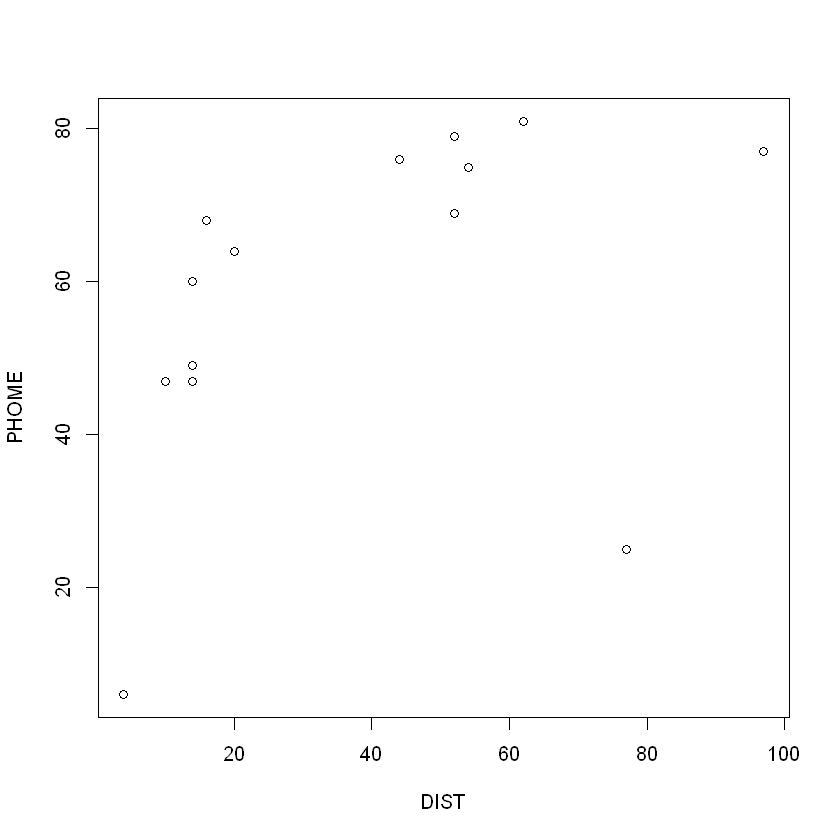

In [39]:
 plot(DIST, PHOME)
 cor(DIST, PHOME)

[1] -0.7577307

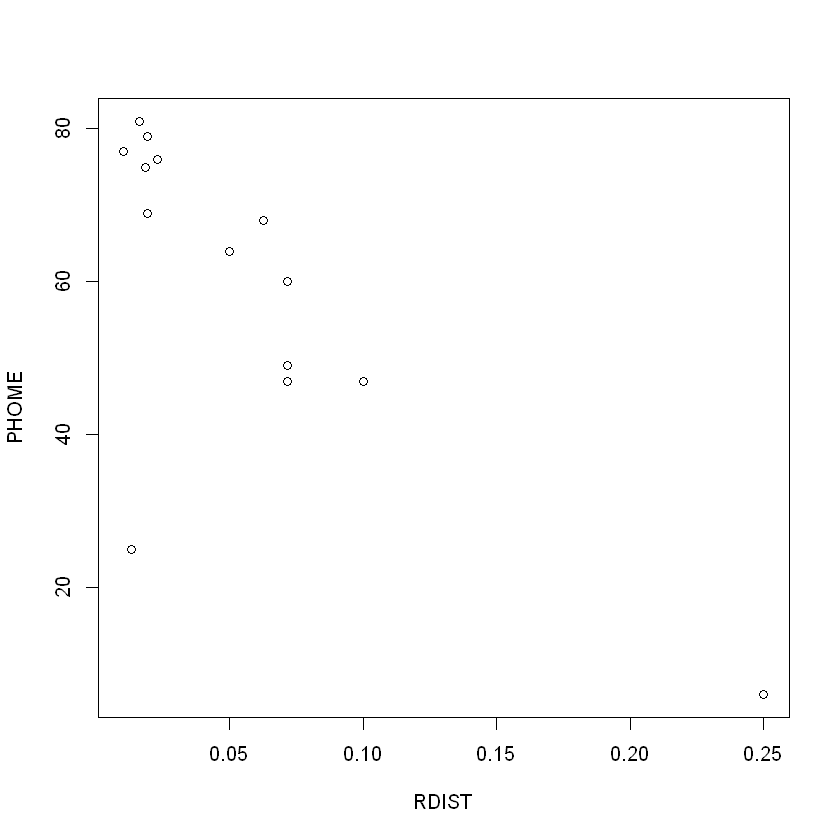

In [41]:
RDIST = 1/DIST
plot(RDIST, PHOME)
cor(RDIST, PHOME)


Call:
lm(formula = PHOME ~ RDIST)

Coefficients:
(Intercept)        RDIST  
      73.93      -266.32  


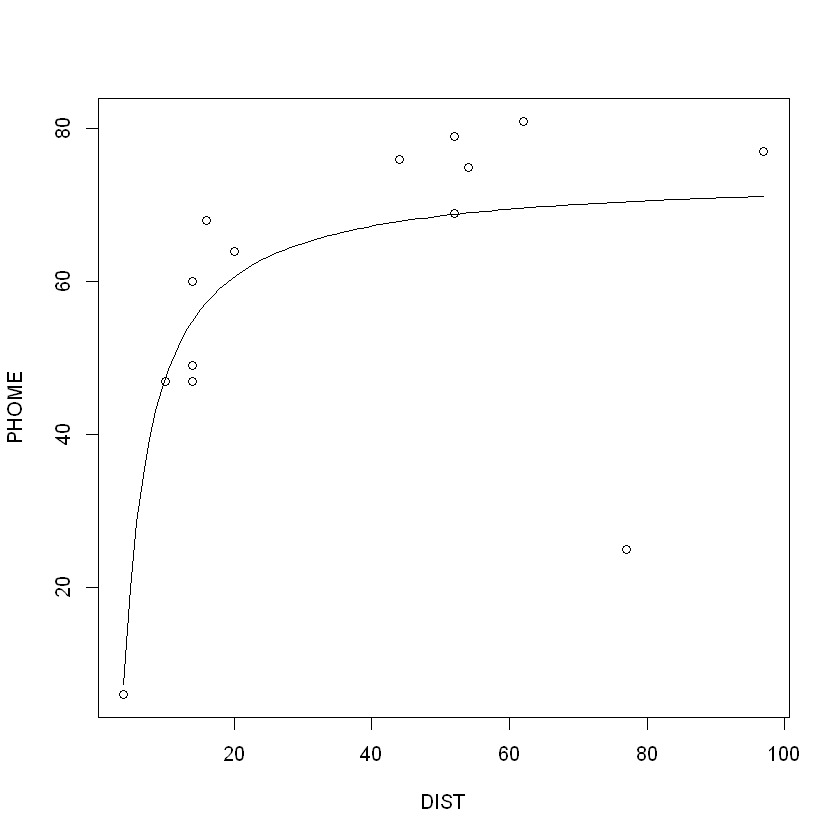

In [45]:
M = lm(PHOME ~ RDIST)
M
plot(DIST, PHOME)
curve(M$coef[1] + M$coef[2] / x, add=TRUE)

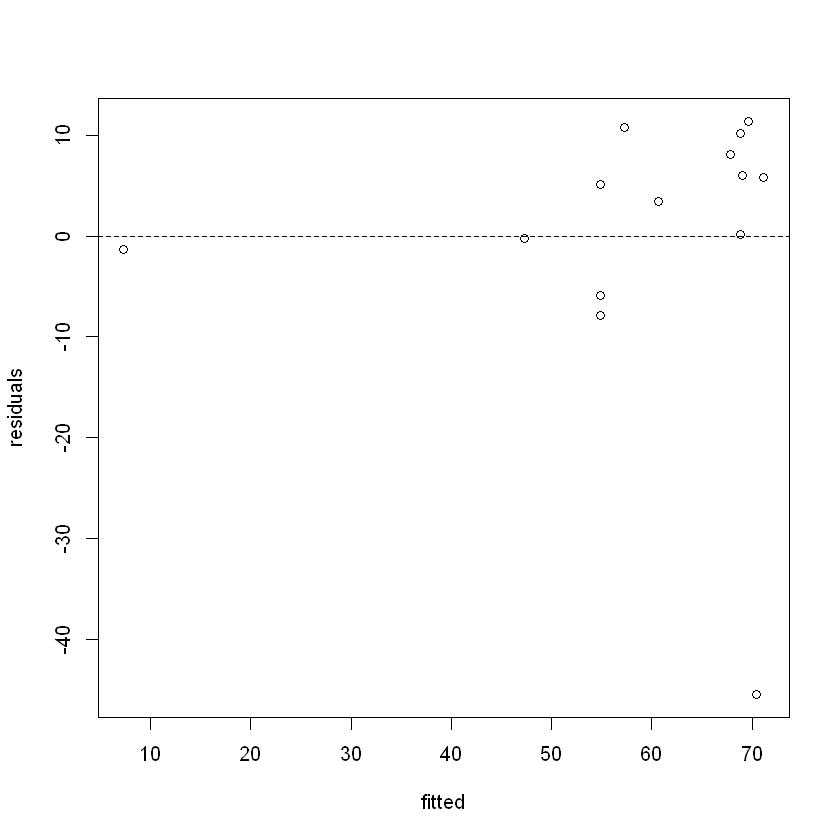

In [47]:
plot(M$fitted, M$resid, xlab="fitted", ylab="residuals")
abline(h=0, lty=2)

integer(0)

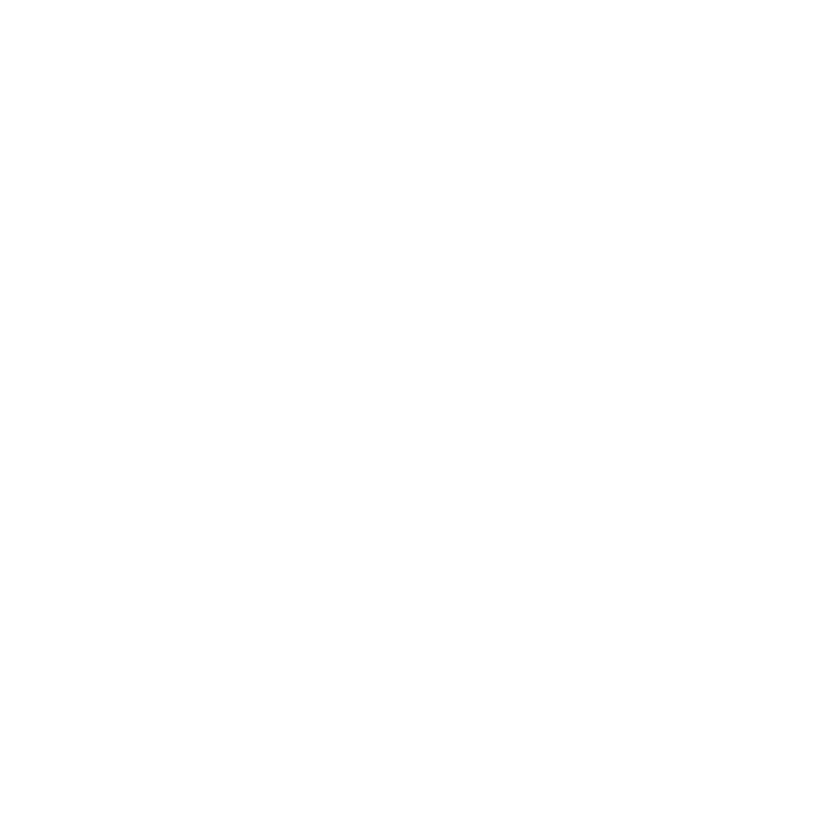

In [49]:
plot.new()
lab = abbreviate(COUNTY)
identify(M$fitted.values, M$residuals, n=1, labels=lab)

In [50]:
 lunatics[13, ]

,COUNTY,NBR,DIST,POP,PDEN,PHOME
13,NANTUCKET,12,77,1.74,179,25


In [ ]:
CPUspeed = read.table("CPUspeed.txt", header=TRUE)